<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **훈련 성능 향상하기**

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

(train_images,train_labels),_ = mnist.load_data()
train_images =train_images.reshape((60000,28 *28))
train_images =train_images.astype("float32") /255
model = keras.Sequential([
        layers.Dense(512,activation="relu"),
        layers.Dense(10,activation="softmax")
        ])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images,train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 8s 18ms/step - loss: 546.4495 - accuracy: 0.3052 - val_loss: 2.3918 - val_accuracy: 0.2322
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 3.6143 - accuracy: 0.2365 - val_loss: 2.2498 - val_accuracy: 0.2018
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 2.7698 - accuracy: 0.1926 - val_loss: 2.5266 - val_accuracy: 0.1889
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.4407 - accuracy: 0.1928 - val_loss: 2.2059 - val_accuracy: 0.2087
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.3698 - accuracy: 0.1993 - val_loss: 2.3147 - val_accuracy: 0.2002
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 2.3063 - accuracy: 0.1896 - val_loss: 2.2497 - val_accuracy: 0.1995
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 2.3251 - accuracy: 0.1950 - val_loss: 2.2491 - val_accuracy: 0.18

**같은 모델을 적절한 학습률로 훈련하기**

In [6]:
model = keras.Sequential([
        layers.Dense(512,activation="relu"),
        layers.Dense(10,activation="softmax")])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3529 - accuracy: 0.9111 - val_loss: 0.1678 - val_accuracy: 0.9538
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1269 - accuracy: 0.9645 - val_loss: 0.1354 - val_accuracy: 0.9651
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0997 - accuracy: 0.9736 - val_loss: 0.1478 - val_accuracy: 0.9654
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0786 - accuracy: 0.9793 - val_loss: 0.1380 - val_accuracy: 0.9707
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0669 - accuracy: 0.9829 - val_loss: 0.1499 - val_accuracy: 0.9744
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0593 - accuracy: 0.9854 - val_loss: 0.1722 - val_accuracy: 0.9727
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0507 - accuracy: 0.9873 - val_loss: 0.2242 - val_accuracy: 0.9731

**MNIST 데이터를 사용한 간단한 로지스틱 회기 모델**

In [7]:
model = keras.Sequential([layers.Dense(10,activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model =model.fit(
        train_images, train_labels,
        epochs=20,
        batch_size=128,
        validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6622 - accuracy: 0.8373 - val_loss: 0.3616 - val_accuracy: 0.9010
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3540 - accuracy: 0.9023 - val_loss: 0.3111 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3183 - accuracy: 0.9118 - val_loss: 0.2929 - val_accuracy: 0.9175
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.9160 - val_loss: 0.2840 - val_accuracy: 0.9208
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2926 - accuracy: 0.9188 - val_loss: 0.2791 - val_accuracy: 0.9232
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2861 - accuracy: 0.9199 - val_loss: 0.2782 - val_accuracy: 0.9227
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2809 - accuracy: 0.9220 - val_loss: 0.2730 - val_accuracy: 0.9262
Epoch 

**훈련한 손실곡선**

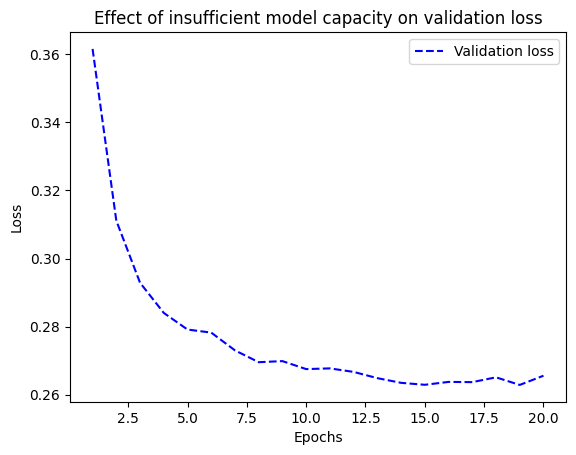

In [8]:
import matplotlib.pyplot as plt

val_loss = history_small_model.history["val_loss"]
epochs =range(1,21)
plt.plot(epochs,val_loss,"b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

96개 유닛을 가진 2개의 중간층으로 용량이 더 큰 모델 훈련

In [9]:
model = keras.Sequential([
    layers.Dense(96,activation="relu"),
    layers.Dense(96,activation="relu"),
    layers.Dense(10,activation="softmax"),])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model =model.fit(
       train_images, train_labels,
       epochs=20,
       batch_size=128,
       validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3728 - accuracy: 0.8937 - val_loss: 0.1955 - val_accuracy: 0.9451
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1646 - accuracy: 0.9507 - val_loss: 0.1416 - val_accuracy: 0.9575
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1160 - accuracy: 0.9646 - val_loss: 0.1108 - val_accuracy: 0.9678
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0886 - accuracy: 0.9729 - val_loss: 0.1087 - val_accuracy: 0.9658
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 0.1074 - val_accuracy: 0.9684
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0.0952 - val_accuracy: 0.9722
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0466 - accuracy: 0.9860 - val_loss: 0.1090 - val_accuracy: 0.9688
Epoch 

**더 큰 모델 훈련한 손실곡선**

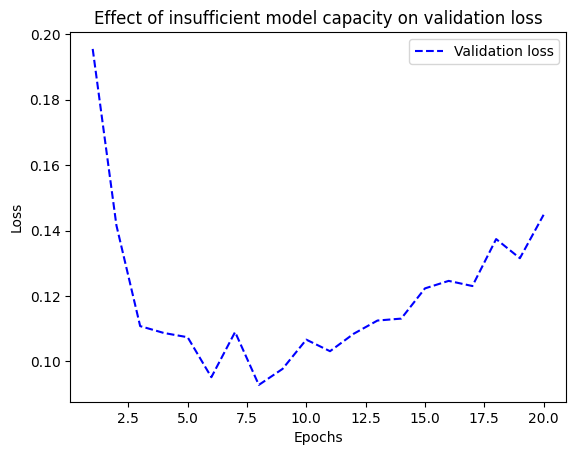

In [13]:
import matplotlib.pyplot as plt

val_loss = history_large_model.history["val_loss"]
epochs =range(1,21)
plt.plot(epochs,val_loss,"b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()